In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

%matplotlib inline


In [30]:
bank=pd.read_csv(r"C:\Users\14695\Desktop\Data Science Boot Camp Texas A&M\Data Science Class Data\Project 4 Machine Learning\Bank\bank-full.csv",sep=";")

In [31]:
bank.shape

(45211, 17)

In [36]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [37]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [38]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [39]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [51]:
bank=bank.drop_duplicates(keep='last')
bank.shape

(45195, 16)

In [40]:
counts = bank['y'].value_counts()
print(counts)

no     39922
yes     5289
Name: y, dtype: int64


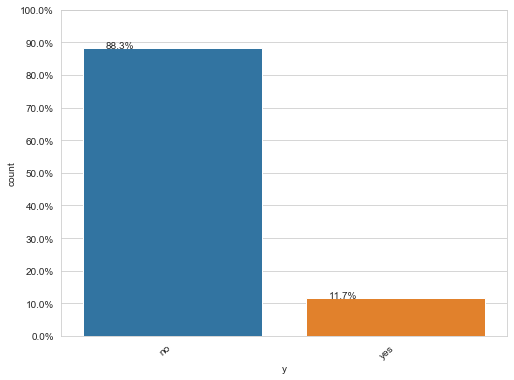

In [41]:
  plt.figure(figsize=(8,6))
  Y = bank["y"]
  total = len(Y)*1.
  ax=sns.countplot(x="y", data=bank)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()



### A large imbalance exists in the label for this data set. Most people contacted do not become customers
This imbalance will have implication for model selection and the metrics used to evaluate a models predictibility.

# Univariate Feature Analysis Numeric Data

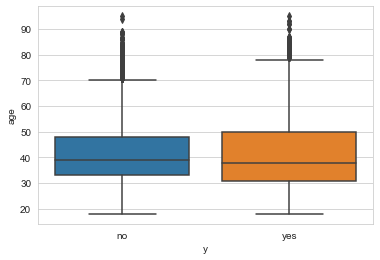

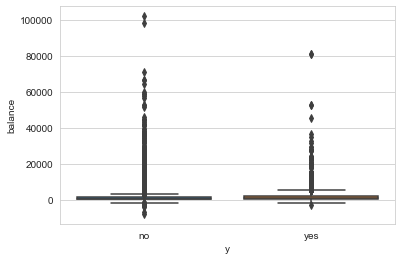

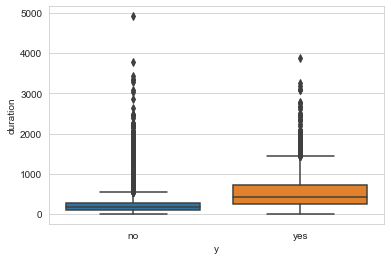

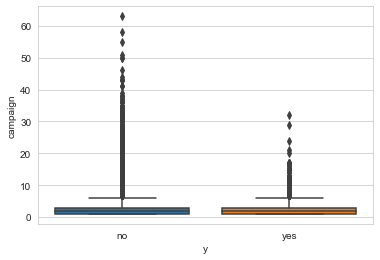

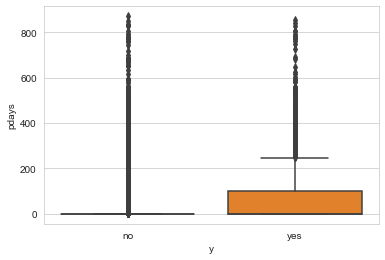

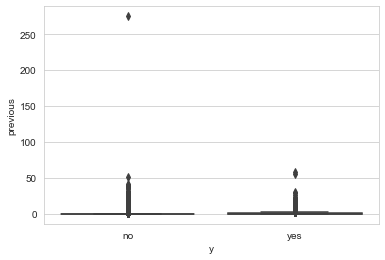

In [42]:
def plot_box(bank, cols, col_x = 'y'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=bank)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
plot_box(bank, num_cols)

Text(0.5, 1.05, 'Pearson correlation of Features')

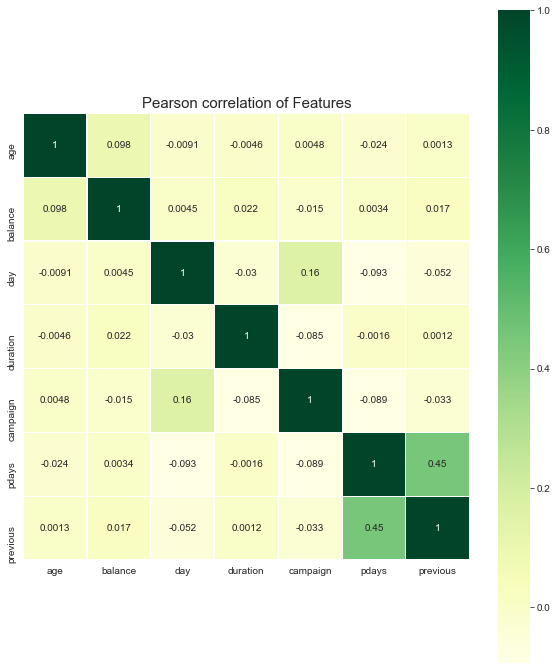

In [43]:
corr= bank.corr()
f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

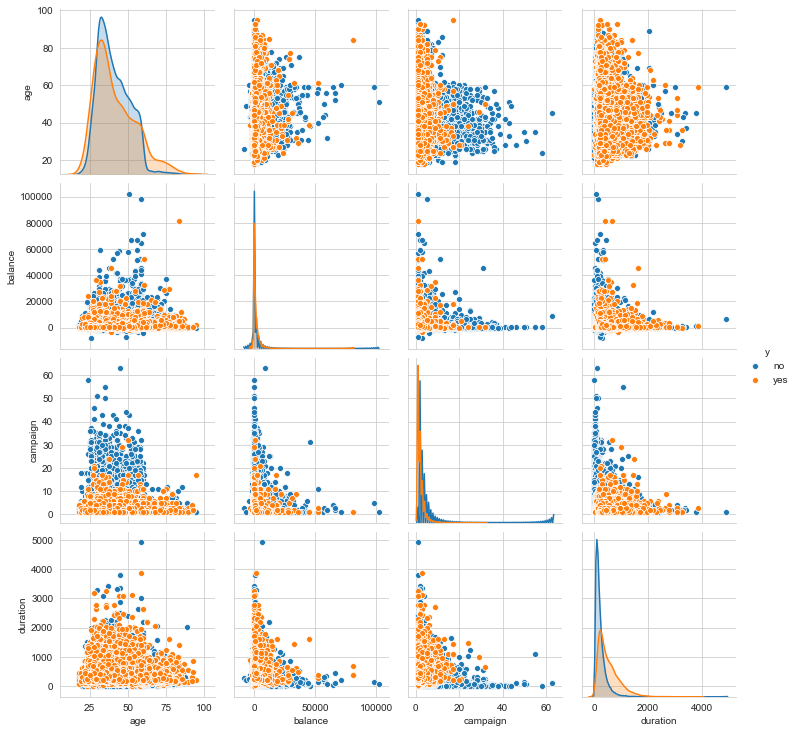

In [44]:
sns.pairplot(data=bank, hue='y', vars=['age', 'balance','campaign','duration'])

## Univariate Analysis Numeric:
### Box plots show most features do between yes and no , other than duration, pdays has the most unique distribution. Additionally, a significant occurance of outliers exists in this data, rescaling using Robust Scaler could benefit the ML model.

### From the cross plots, the relationship seen with campaign and age indicates that people of any age are not likley to become customers after 10 contacts.

### Correlation of the numeric data shows little to no correlation between the numeric features, with the exception of pdays and previous. To avoid any colinearity and preserve the predictive benefit of pdays, previous will be dropped.¶

# Univariate Feature Analysis Categorical Data

In [45]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = bank[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset,)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5),fontsize=15)

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11),)
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total),fontsize=15)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=15)
 
  # ax.legend(labels=["no","yes"])
  plt.show()

In [46]:
## Histograms with no/yes seperated

%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10),)
  Y = bank[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5),fontsize=15)

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total),fontsize=15)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=15)
  # ax.legend(labels=["no","yes"])
  plt.show()

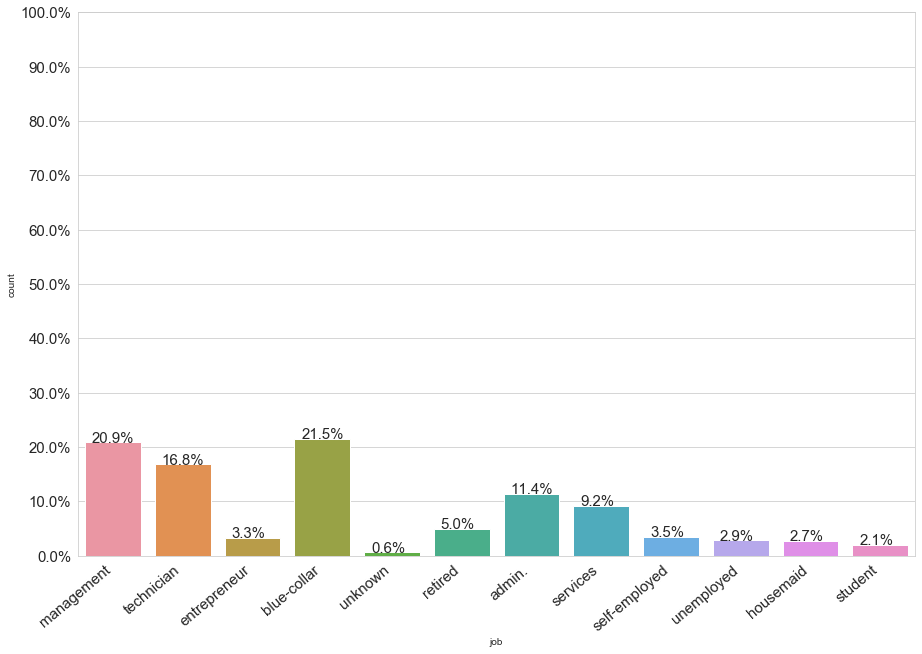

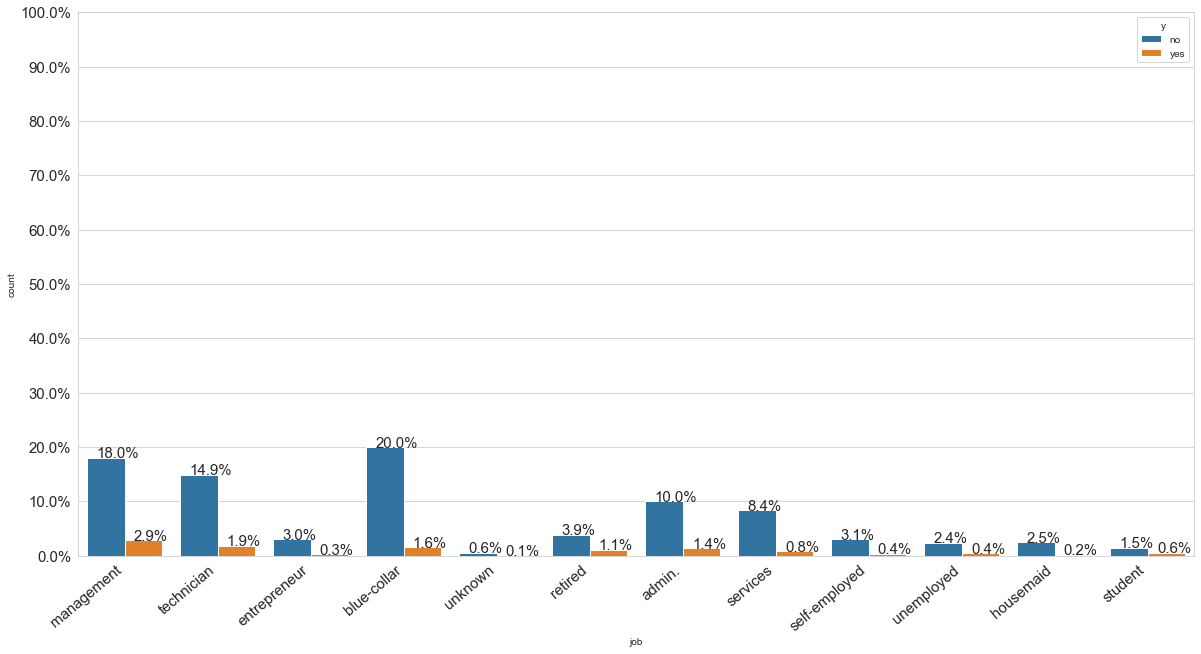

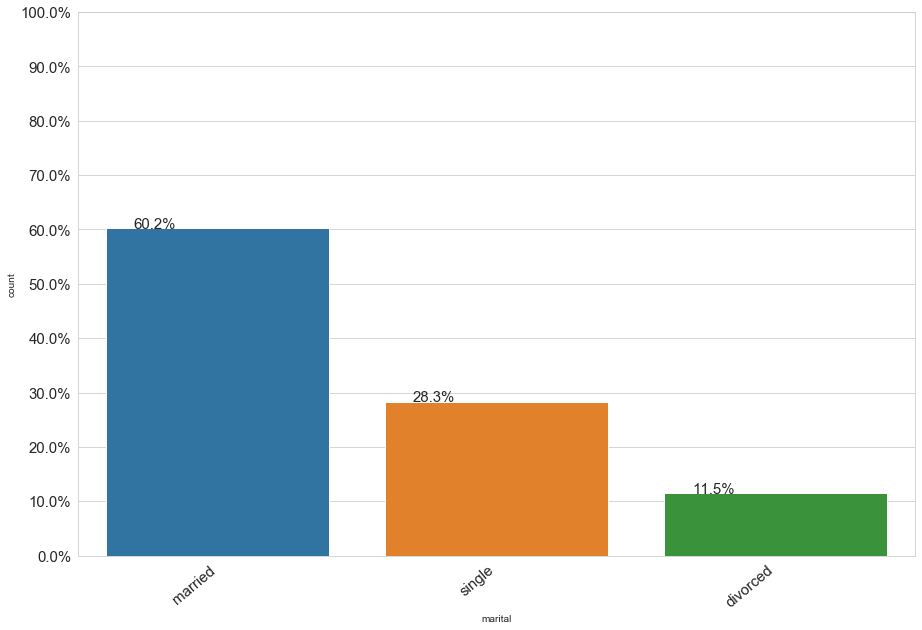

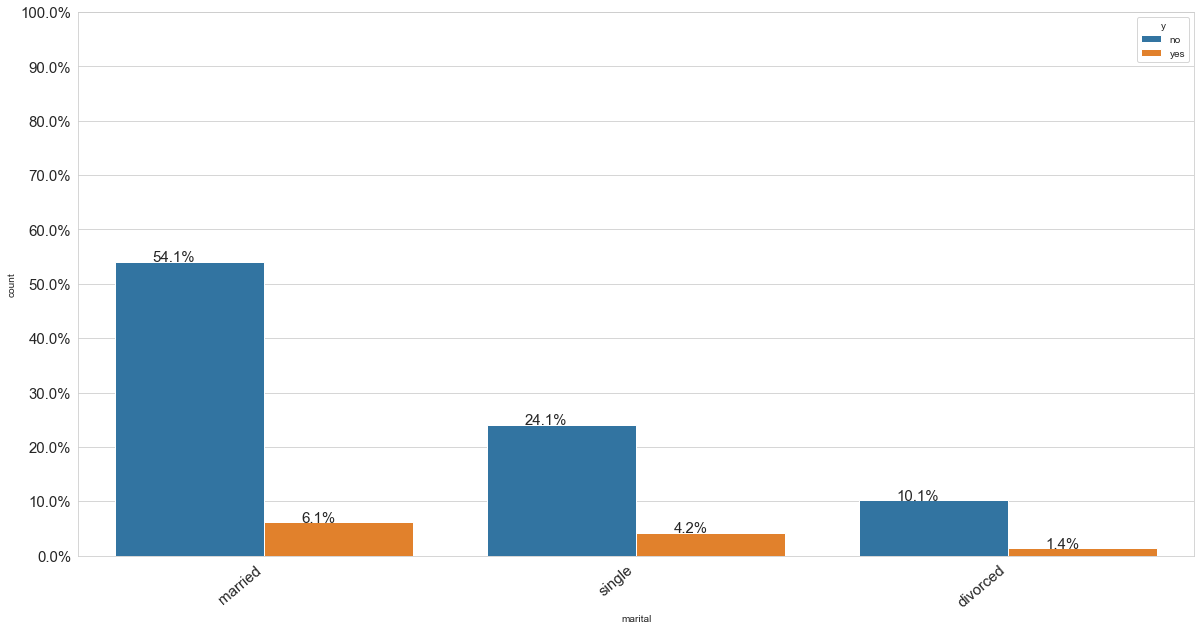

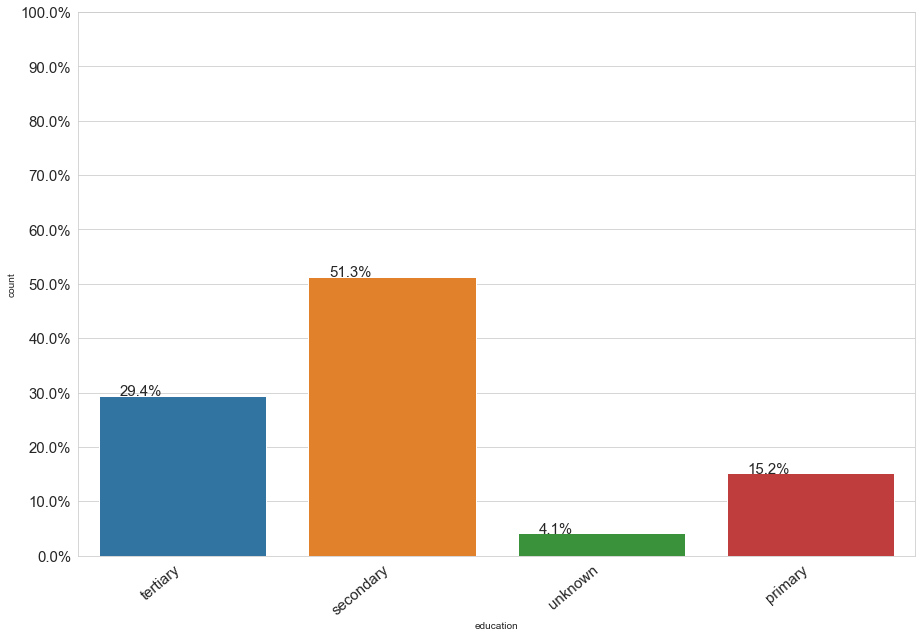

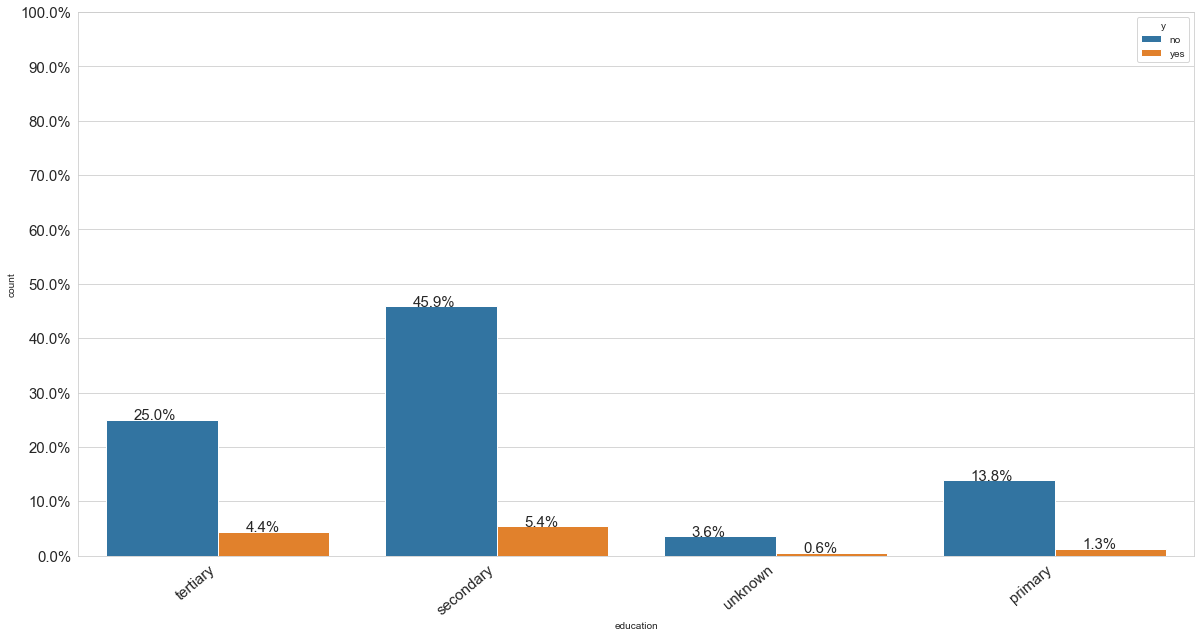

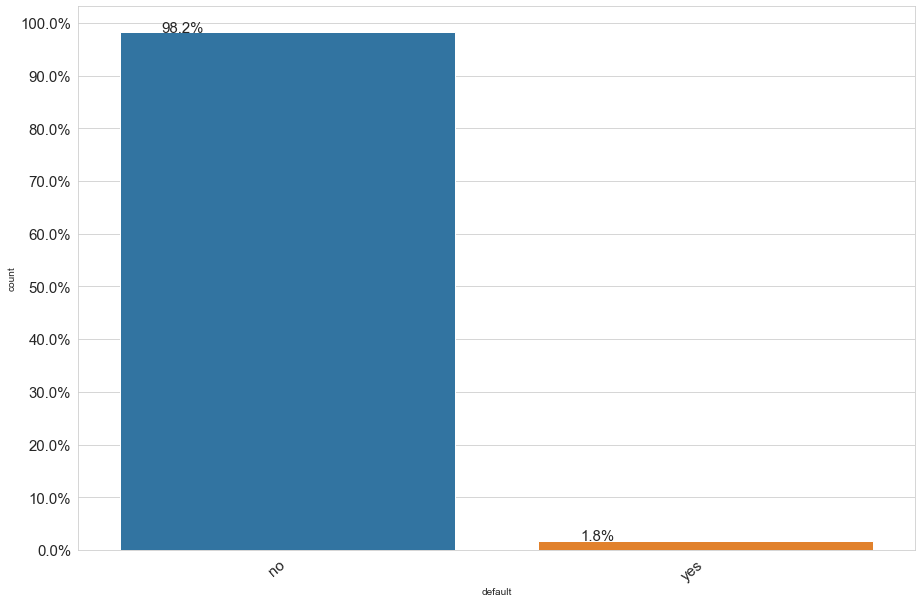

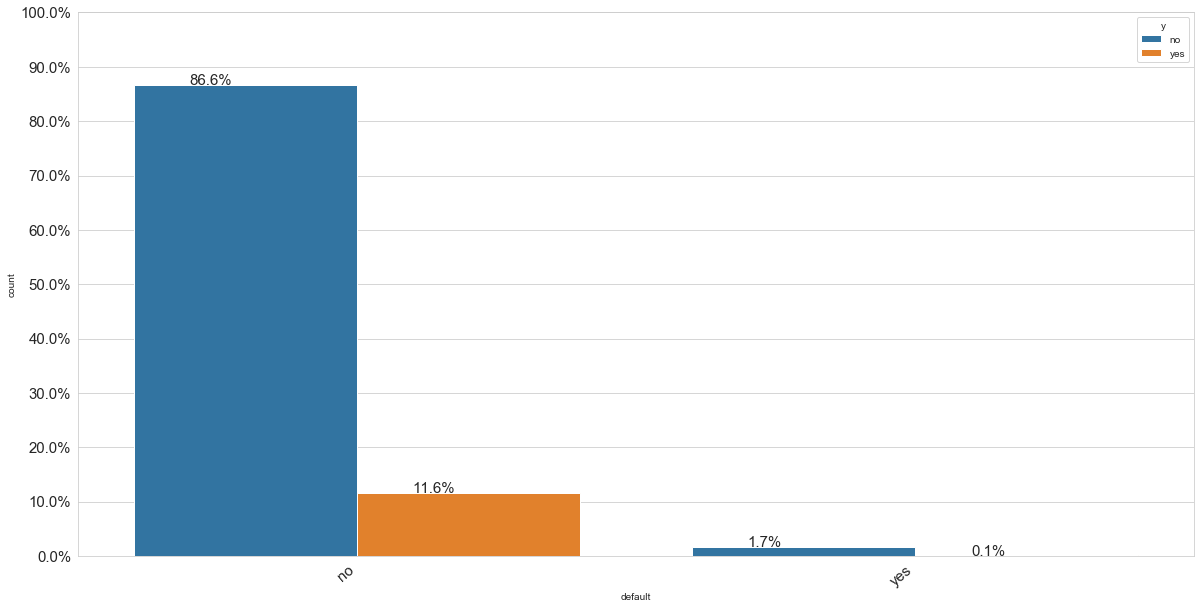

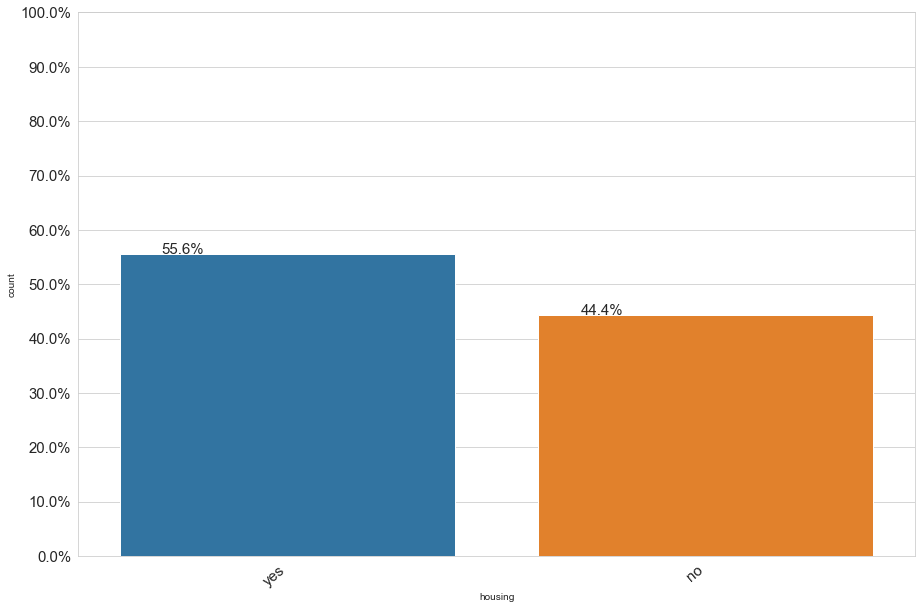

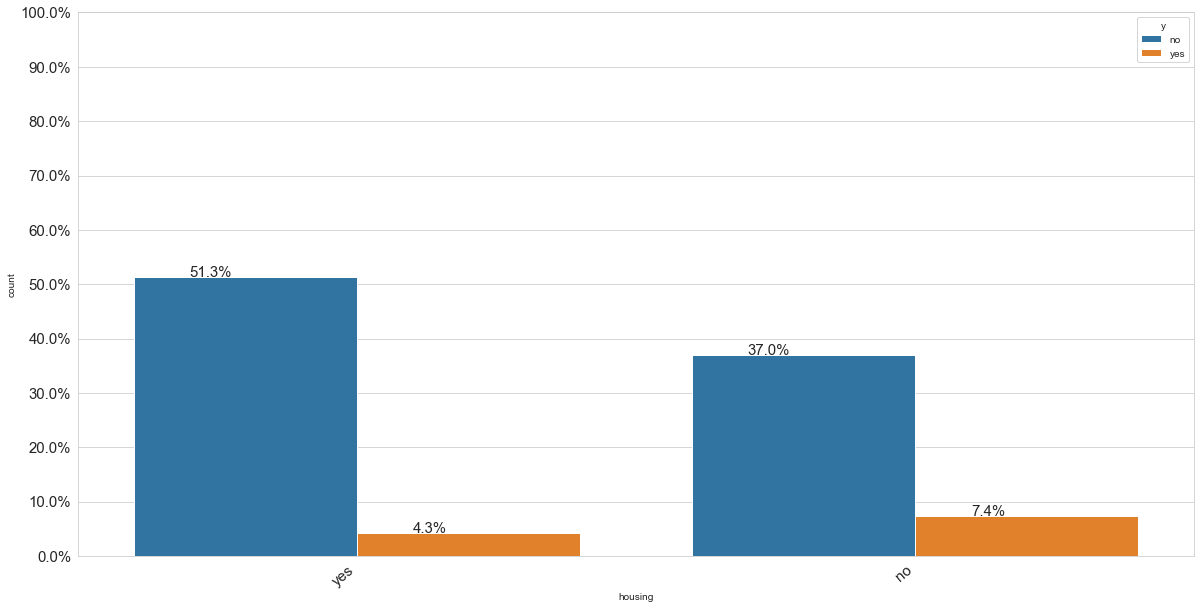

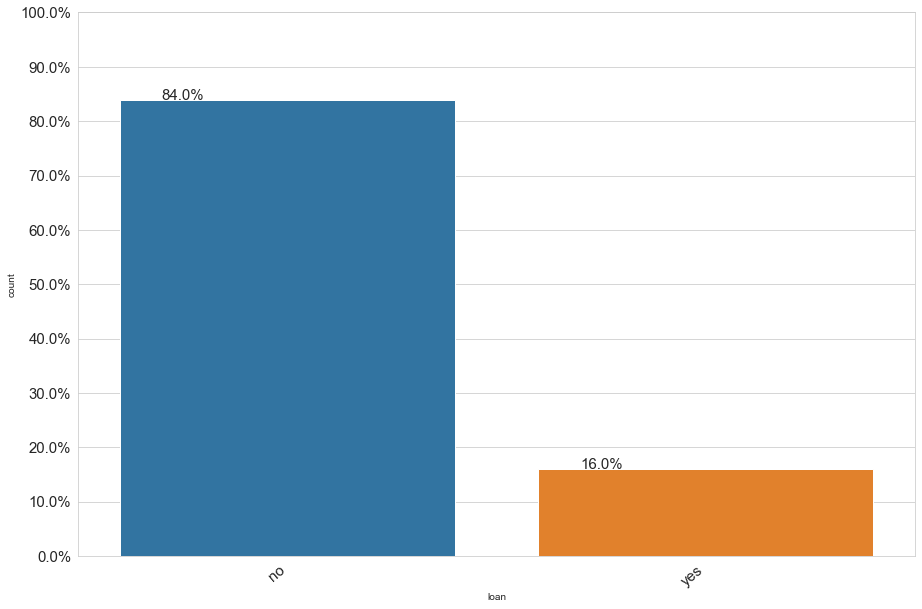

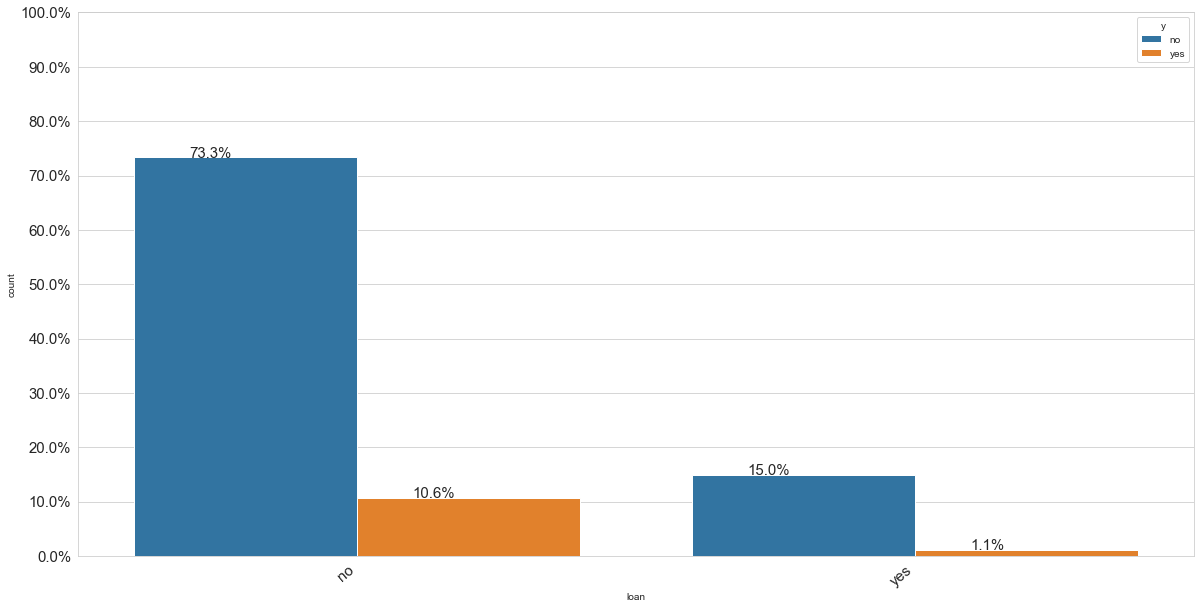

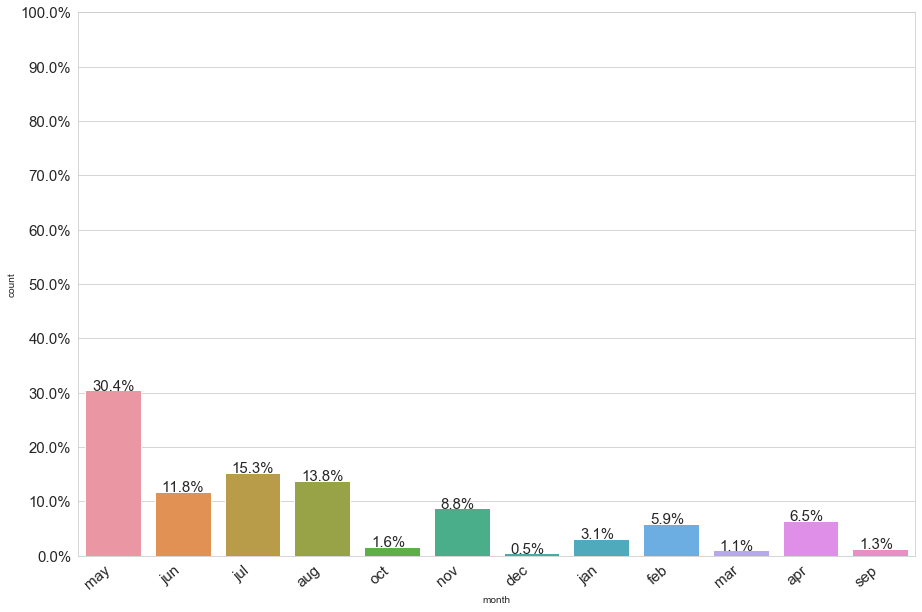

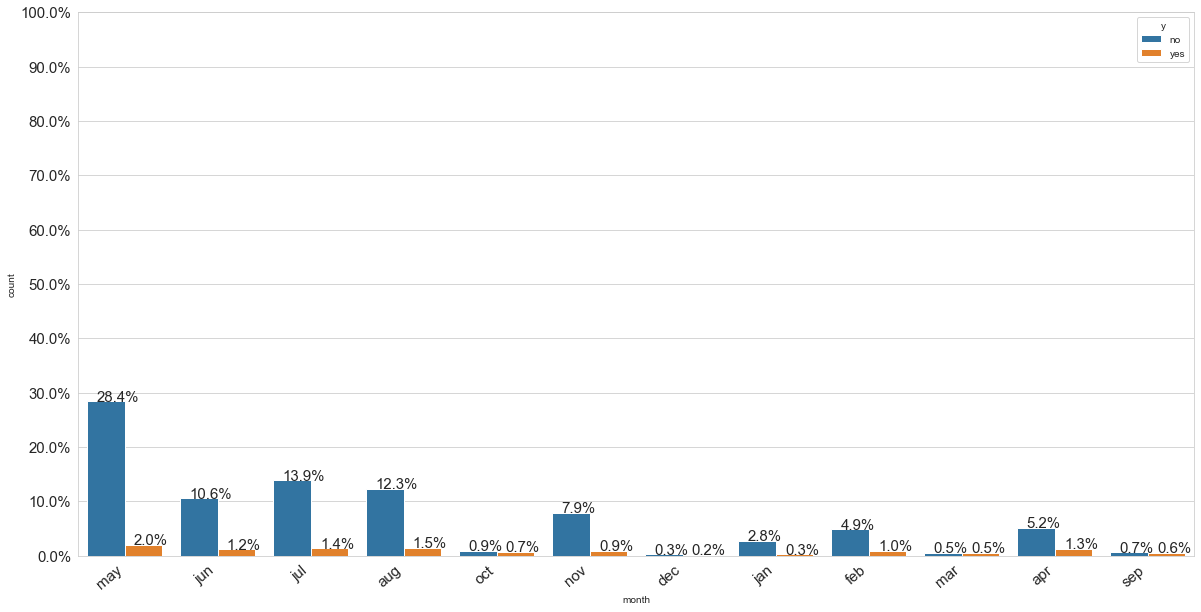

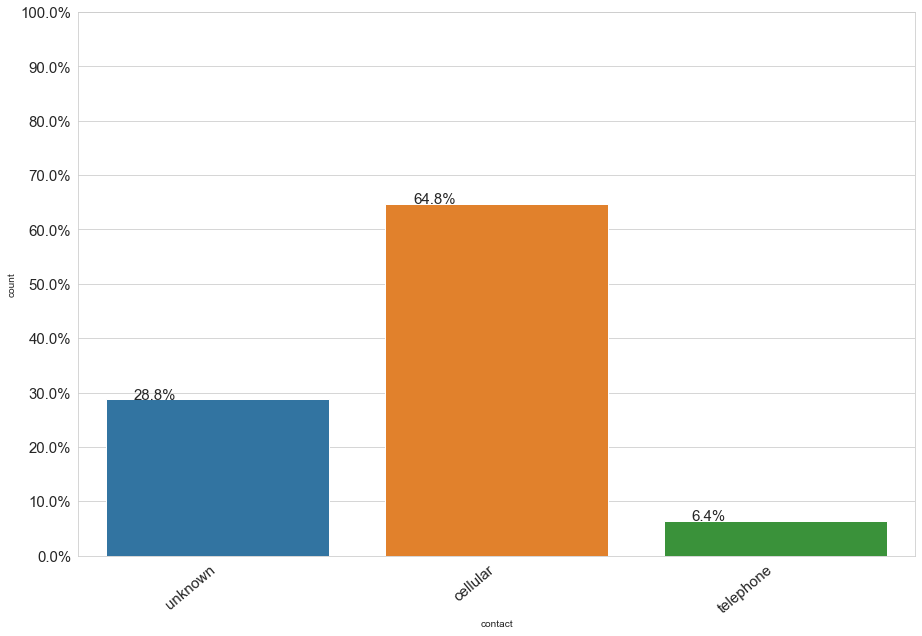

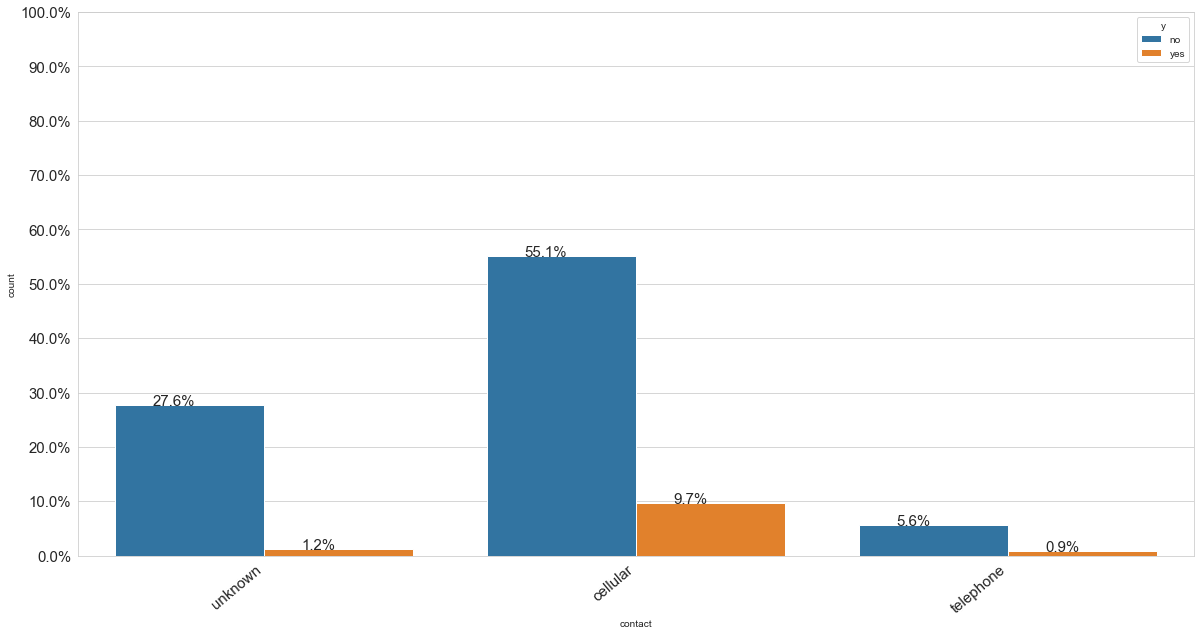

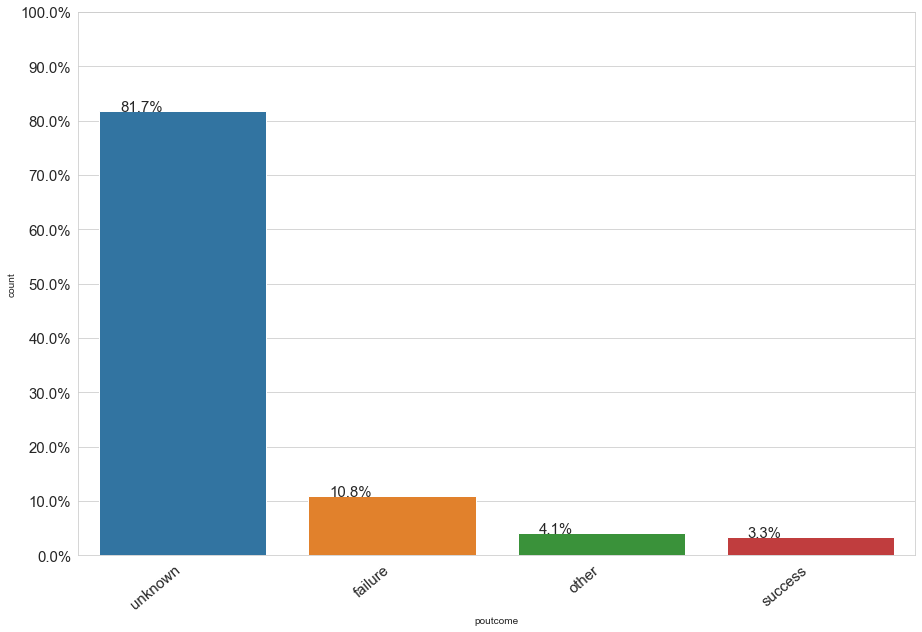

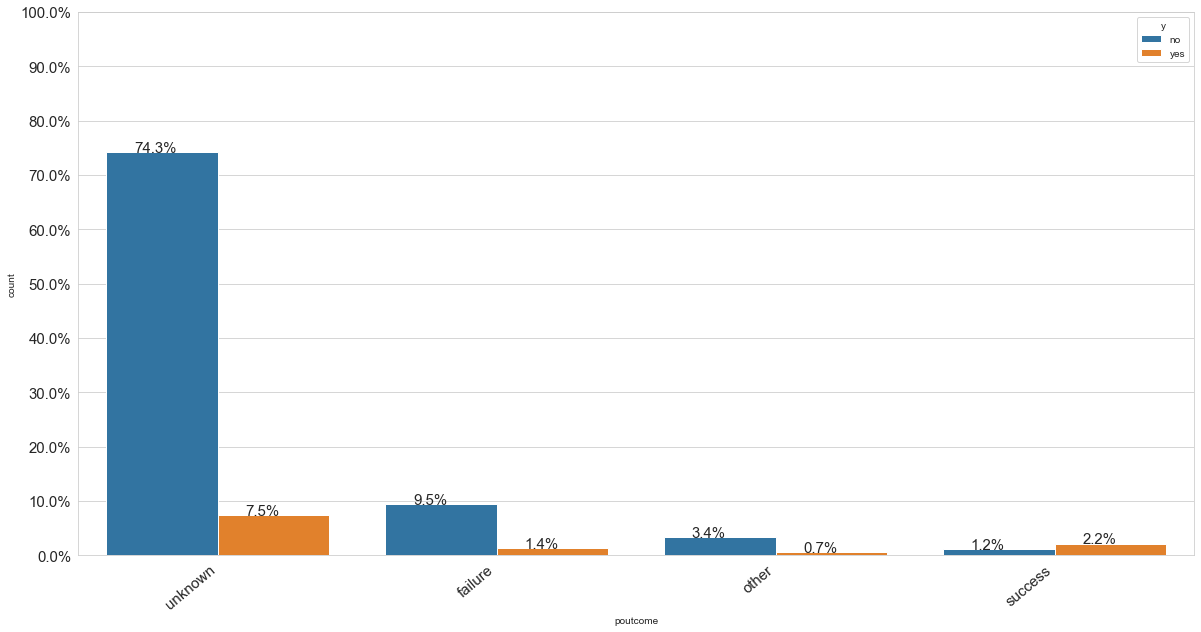

In [47]:
countplot("job", bank)
countplot_withY("job", bank)
countplot("marital", bank)
countplot_withY("marital", bank)
countplot("education", bank)
countplot_withY("education", bank)
countplot("default", bank)
countplot_withY("default", bank)
countplot("housing", bank)
countplot_withY("housing", bank)
countplot("loan", bank)
countplot_withY("loan", bank)
countplot("month", bank)
countplot_withY("month", bank)
countplot("contact", bank)
countplot_withY("contact", bank)
countplot("poutcome", bank)
countplot_withY("poutcome", bank)

In [50]:
bank = bank.drop(['duration'],axis=1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [59]:
labels=np.array(bank['y'])
bank= bank.drop(['y'],axis=1)

In [60]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown
